<a href="https://colab.research.google.com/github/chadBookW/Story/blob/main/Solubility_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression based program


# load *data*

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data Preparation


## Data seperaton as X and Y

In [ ]:
y=df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
x=df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=100 )



# Model Building

##Linear Regression


### Training the model


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

### Applying the model to get prediction

In [ ]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [ ]:
y_lr_test_pred


In [ ]:
y_lr_train_pred


### Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse= mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2= r2_score(y_train,y_lr_train_pred)

lr_test_mse= mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2= r2_score(y_test,y_lr_test_pred)


print("LR TRAIN MSE : ", lr_train_mse)
print("LR TRAIN R2 : ", lr_train_r2)
print("LR TEST MSE : ", lr_test_mse)
print("LR TEST R2 : ", lr_test_r2)


LR TRAIN MSE :  1.0075362951093687
LR TRAIN R2 :  0.7645051774663391
LR TEST MSE :  1.0206953660861033
LR TEST R2 :  0.7891616188563282


In [ ]:
lr_results=pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2 ]).transpose()
lr_results.columns=['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


# Data Visualization


Text(0.5, 0, 'Actual logS')

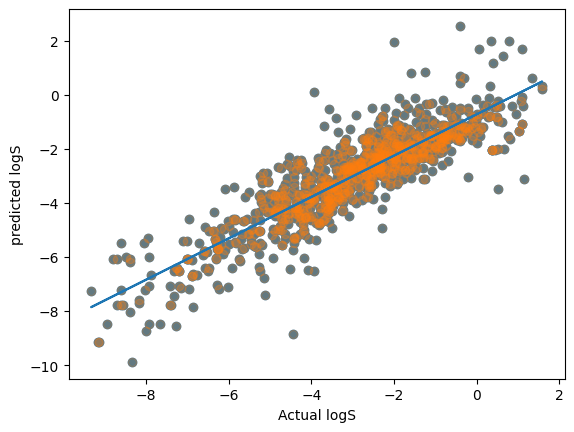

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_train, y_lr_train_pred)


z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(y_train, p(y_train))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
plt.plot()
plt.ylabel('predicted logS')
plt.xlabel('Actual logS')